In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def my_matrix(n):
    h = 1/n

    a = -2 * np.ones(n-1)
    b = np.ones(n-2)

    A = np.diag(b, -1) + np.diag(a, 0) + np.diag(b, 1)

    return A/h**2

In [3]:
# returns structured array of eigen value & vector pairs sorted by value
def sorted_eigen_pairs(A):
    [values, vectors] = np.linalg.eig(A)

    n = len(values)

    pairs = np.zeros(n, dtype = [('eigen_value', 'f8'),
                                 ('eigen_vector', 'f8', (n))])

    pairs['eigen_value'] = values
    pairs['eigen_vector'] = vectors

    indices = np.argsort(pairs, order = ['eigen_value'])
    indices = np.flip(indices)

    return pairs[indices]

In [21]:
n_max = 32

print("----------------------------------------------------------------")
print("")

for n in range(2, n_max+1):
    print("n =", n)
#    print("h =", 1/n)
    print("")

    A = my_matrix(n)

    """
    print("Matrix:")
    print(A)
    print("")
    """

    pairs = sorted_eigen_pairs(A)

    values  = []
    vectors = []
    for i in range(n-1):
        values  += [pairs[i][0]]
        vectors += [pairs[i][1]]

    """
    print("Eigenpairs:")
    for pair in pairs:
        print(pair)
    print("")
    """

#    """
    print("Eigenvalues:")
    for value in values:
        print(value)
    print("")
#    """

#    """
    print("Eigenvectors:")
    for vector in vectors:
        print(vector)
    print("")
#    """

    print("----------------------------------------------------------------")
    print("")

----------------------------------------------------------------

n = 2

Eigenvalues:
-8.0

Eigenvectors:
1.0

----------------------------------------------------------------

n = 3

Eigenvalues:
-9.0
-27.0

Eigenvectors:
[ 0.70710678 -0.70710678]
[0.70710678 0.70710678]

----------------------------------------------------------------

n = 4

Eigenvalues:
-9.372583002030478
-31.999999999999996
-54.62741699796946

Eigenvectors:
[ 0.5        -0.70710678  0.5       ]
[-7.07106781e-01 -4.05405432e-16  7.07106781e-01]
[0.5        0.70710678 0.5       ]

----------------------------------------------------------------

n = 5

Eigenvalues:
-9.549150281252611
-34.54915028125264
-65.45084971874735
-90.45084971874735

Eigenvectors:
[-0.37174803  0.60150096 -0.37174803  0.60150096]
[-0.60150096  0.37174803  0.60150096 -0.37174803]
[-0.37174803 -0.60150096  0.37174803  0.60150096]
[-0.60150096 -0.37174803 -0.60150096 -0.37174803]

----------------------------------------------------------------


[-0.20990586  0.30774377 -0.24127843  0.04599544 -0.17384434  0.30086929
  0.26726124  0.09096342  0.13389943  0.28727388  0.28727388  0.13389943
 -0.09096342 -0.20990586 -0.30774377  0.24127843  0.04599544 -0.17384434
 -0.30086929 -0.26726124]
[ 0.17384434 -0.28727388  0.30086929 -0.20990586 -0.04599544 -0.13389943
 -0.26726124 -0.30774377  0.24127843  0.09096342 -0.09096342 -0.24127843
 -0.30774377 -0.17384434 -0.28727388  0.30086929  0.20990586  0.04599544
 -0.13389943 -0.26726124]
[-1.33899429e-01  2.41278434e-01 -3.00869286e-01  3.00869286e-01
  2.41278434e-01 -1.33899429e-01  2.22956939e-15  1.33899429e-01
 -2.41278434e-01 -3.00869286e-01 -3.00869286e-01 -2.41278434e-01
 -1.33899429e-01 -1.33899429e-01 -2.41278434e-01  3.00869286e-01
  3.00869286e-01  2.41278434e-01  1.33899429e-01  4.09360056e-16]
[ 0.09096342 -0.17384434  0.24127843 -0.28727388 -0.30774377  0.30086929
  0.26726124  0.20990586 -0.13389943 -0.04599544  0.04599544  0.13389943
  0.20990586 -0.09096342 -0.17384434  

-3324.6757747043666
-3354.140043933638

Eigenvectors:
[ 0.24396124 -0.18059873  0.11026828  0.26222772 -0.08385269  0.20015356
  0.23202163  0.02839345  0.25304062  0.15892653 -0.13539108 -0.25915334
 -0.056454   -0.21736178 -0.21736178 -0.056454   -0.25915334 -0.24396124
 -0.18059873  0.11026828  0.26222772 -0.08385269  0.20015356 -0.23202163
  0.02839345 -0.13539108  0.25304062 -0.15892653]
[-0.23202163  0.21736178 -0.02839345 -0.24396124  0.20015356 -0.056454
 -0.25304062  0.18059873 -0.08385269 -0.25915334 -0.15892653  0.11026828
  0.26222772 -0.13539108  0.13539108 -0.26222772 -0.11026828 -0.23202163
 -0.21736178  0.02839345  0.24396124 -0.20015356  0.056454   -0.25304062
 -0.18059873  0.15892653  0.08385269 -0.25915334]
[ 0.21736178 -0.24396124 -0.056454    0.18059873 -0.25915334 -0.11026828
  0.13539108 -0.26222772 -0.15892653  0.08385269  0.25304062  0.20015356
 -0.02839345  0.23202163  0.23202163 -0.02839345  0.20015356 -0.21736178
 -0.24396124 -0.056454    0.18059873 -0.25915

In [5]:
for n in range(10):
    print("({} * pi)^2 =".format(n), (n * np.pi)**2)

(0 * pi)^2 = 0.0
(1 * pi)^2 = 9.869604401089358
(2 * pi)^2 = 39.47841760435743
(3 * pi)^2 = 88.82643960980423
(4 * pi)^2 = 157.91367041742973
(5 * pi)^2 = 246.74011002723395
(6 * pi)^2 = 355.3057584392169
(7 * pi)^2 = 483.61061565337855
(8 * pi)^2 = 631.6546816697189
(9 * pi)^2 = 799.437956488238


In [57]:
# n_max .......... maximum matrix type
# eigen_amount ... maximum amount of eigen values to track

# ---------------------------------------------------------------- #

# plots convergence error of eigen values
def plot_1(n_max, eigen_amount):
    # there are n_max-1 eigen values/vectors at max
    assert eigen_amount < n_max

    # where eigen values should converge to
    eigen_limits = -(np.array(range(1, eigen_amount+1)) * np.pi)**2

    # matrix types
    x = np.array(range(2, n_max+1))

    # upper triangular matrix of eigen values times eigen value instances
    y = np.zeros((eigen_amount, len(x)))

    # iterate over eigen value instances
    for i in range(y.shape[1]):
        A     = my_matrix(x[i])
        pairs = sorted_eigen_pairs(A)

        eigen_values  = []
        eigen_vectors = []
        for j in range(x[i]-1):
            eigen_values  += [pairs[j][0]]
            eigen_vectors += [pairs[j][1]]

        # iterate over eigen values in instance
        for j in range(np.minimum(x[i]-1, eigen_amount)):
            y[j][i] = abs(eigen_limits[j] - eigen_values[j])

    # do actual plotting
    for j in range(eigen_amount):
        plt.loglog(x[j::], y[j][j::], 'o-')

    # add reference
    plt.loglog(x, 1/x**2)

    # add legend
    legend = []
    legend += ["$\epsilon_{}$".format(j) for j in range(1, eigen_amount+1)]
    legend += ["id$^{{-2}}$"]

    plt.legend((*legend,))

    plt.grid(linestyle = ':')
    plt.show()

# ---------------------------------------------------------------- #

# eigen_number ... which eigen vector to track

# plots eigen vector iterations
def plot_2(n_max, eigen_number):
    plt.figure(figsize = (15, 5))

    # there are n_max-1 eigen values/vectors at max
    assert eigen_amount < n_max

    # iterate over eigen vector instances
    for n in range(n_max, n_max+1):
        A     = my_matrix(n)
        pairs = sorted_eigen_pairs(A)

        eigen_values  = []
        eigen_vectors = []
        for i in range(n-1):
            eigen_values  += [pairs[i][0]]
            eigen_vectors += [pairs[i][1]]

        x = np.linspace(0, 1, n+1)
        y = np.concatenate(([0], eigen_vectors[eigen_number-1], [0]))

        print("x =", x)
        print("y =", y)

        plt.plot(x, y, 'o-')
        kappa = np.pi * eigen_number
        C_1 = 0
        C_2 = 1
        plt.plot(x, C_1*np.cos(kappa * x) + C_2*np.sin(kappa * x))

    plt.grid(linestyle = ':')
    plt.show()

# ---------------------------------------------------------------- #

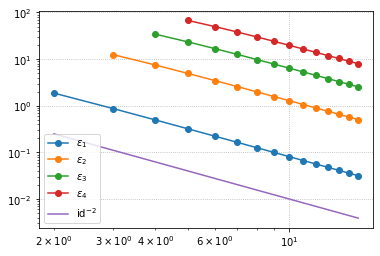

In [61]:
n_max        = 16
eigen_amount = 4

plot_1(n_max, eigen_amount)

x = [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
y = [ 0.         -0.13580604 -0.07577735 -0.09352362 -0.12796187 -0.02212317
 -0.14030621 -0.05616519  0.10896703  0.1217273  -0.03517006  0.14135157
 -0.10309173 -0.06420395 -0.1389164   0.0437016   0.01330893 -0.13306063
  0.08312539 -0.00887992  0.13801547 -0.08667815  0.06813026 -0.1
  0.12392848  0.11696686  0.04790478 -0.11441228  0.11174479  0.05206067
 -0.14114229  0.14079372  0.02649972 -0.12600735  0.00444215 -0.13697834
 -0.07198933 -0.1344997   0.07949059 -0.0901453

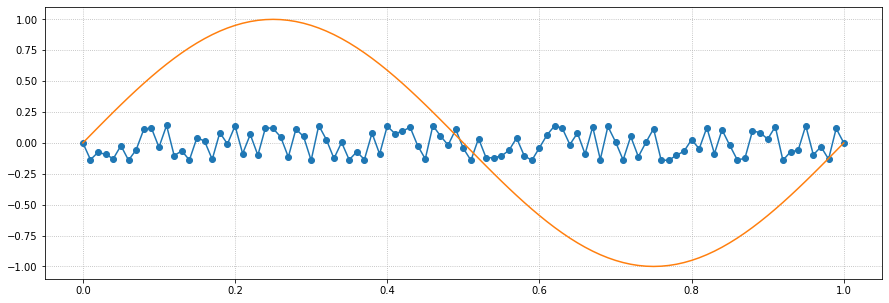

In [59]:
n_max = 100
eigen_number = 2

plot_2(n_max, eigen_number)

In [8]:
def my_determinant_1(n):
    h = 1/n

    a = -2 * np.ones(n-1)
    b = np.ones(n-2)

    A = np.diag(b, -1) + np.diag(a, 0) + np.diag(b, 1)

    return np.linalg.det(A)

def my_determinant_2(n):
    A = my_matrix(n)
    
    return np.linalg.det(A)

In [9]:
n_max = 10

for n in range(2, n_max):
    det = my_determinant_1(n)
    det = round(det, 14)
    print("det(A'_{}) =".format(n), det)

print("")

for n in range(2, n_max):
    det = my_determinant_2(n)
    det = round(det, 4)
    print("det(A_{}) =".format(n), det)

det(A'_2) = -2.0
det(A'_3) = 3.0
det(A'_4) = -4.0
det(A'_5) = 5.0
det(A'_6) = -6.0
det(A'_7) = 7.0
det(A'_8) = -8.0
det(A'_9) = 9.0

det(A_2) = -8.0
det(A_3) = 243.0
det(A_4) = -16384.0
det(A_5) = 1953125.0
det(A_6) = -362797056.0
det(A_7) = 96889010407.0
det(A_8) = -35184372088831.957
det(A_9) = 1.6677181699666658e+16
